# System Model V3 - Query: does market price decline with controller, when $K_i < 0$?


The purpose of this notebook is to simulate a single run of the full CDP and APT system model, using a stochastic Ethereum price and liquidity demand process as a driver.


For this simulation run, we will be asking the following question: does market price decline with controller, when $K_i < 0$?

3. Query: does market price decline with controller, when $K_i < 0$?
---
  - Run simulation with:
     - ETH price shock OFF
     - Liquidity shocks OFF
     - Controller ON with $K_p$ and $K_i$ equalling recommended values
     - Arbitrageur considers liquidation ratio:
       - ON
       - OFF
     - Target price rescaled:
       - ON
       - OFF
       
       
We will override the recommended parameters in [init.py](https://github.com/BlockScience/reflexer/blob/experiment-analysis/models/system_model_v3/model/params/init.py)


In order to test this, configure the following experiment [Query_3.py](experiments/system_model_v3/Query_3.py). Run run this simulation, we create a directory in the ```experiments/system_model_v3``` called ```Query_3/```,and add a ```logs/``` directory inside of it.

Assuming our we have all of the requirements required (run requirements.txt from the ```reflexer/``` root directory to be sure. Assuming our terminal is in the root directory, we run the follow to run the simulation:

```bash
cd experiments/system_model_v3
python3 -m experiments.system_model_v3.Query_3
```
And our simulation will run. The resulting [run log](experiments/system_model_v3/Query_3/experiment_run_log.md) can be found in the ```experiments/system_model_v3/Query_3/``` directory, along with the simulation results stored as ```experiment_results.hdf5```


Below we will import and examine the simulation results.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Import simulation run data


In [2]:
os.getcwd()

'/home/aclarkdata/repos/reflexer/notebooks/analysis'

In [3]:
os.chdir('../../')
os.getcwd()

'/home/aclarkdata/repos/reflexer'

In [4]:
experiment_results = 'experiments/system_model_v3/Query_3/experiment_results.hdf5'
experiment_results_keys = []
with pd.HDFStore(experiment_results) as store:
    experiment_results_keys = list(filter(lambda x: "results" in x, store.keys()))
    exceptions_keys = list(filter(lambda x: "exceptions" in x, store.keys()))

In [5]:
# A list of all experiment result keys
experiment_results_keys

['/results_2021-02-26T10:59:59.004623']

In [6]:
# Copy a results_ key from the above keys to select the experiment
experiment_results_key = experiment_results_keys[-1]#'results_2021-02-09T18:46:33.073363' # Or select last result: experiment_results_keys[-1]
experiment_timestamp = experiment_results_key.strip('results_')
exceptions_key = 'exceptions_' + experiment_timestamp
experiment_timestamp

'/results_2021-02-26T10:59:59.004623'

In [7]:
df_raw = pd.read_hdf(experiment_results, experiment_results_key)
df_raw.tail()

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,RAI_balance,ETH_balance,UNI_supply,uniswap_oracle,simulation,subset,run,substep,timestep,events
17279,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,15537600,2017-06-29 20:00:00,0,274.488020,-450.937979,41106.723963,...,6.904791e+06,30686.737543,4.247171e+06,None,0,3,1,18,4316,NaN
17280,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,15541200,2017-06-29 21:00:00,0,275.895622,-32.226835,20537.248564,...,6.891224e+06,30747.333166,4.247171e+06,None,0,3,1,18,4317,NaN
17281,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,15544800,2017-06-29 22:00:00,0,276.469116,19.396059,10278.322311,...,6.954844e+06,30467.076870,4.247183e+06,None,0,3,1,18,4318,NaN
17282,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,15548400,2017-06-29 23:00:00,0,276.119341,-4.999061,5136.661625,...,6.982949e+06,30344.779588,4.247180e+06,<models.system_model_v3.model.parts.uniswap_or...,0,3,1,18,4319,NaN
17283,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,15552000,2017-06-30 00:00:00,0,276.568228,210.530475,2673.596050,...,6.971944e+06,30392.824337,4.247180e+06,<models.system_model_v3.model.parts.uniswap_or...,0,3,1,18,4320,NaN


## Post process


In [8]:
from experiments.system_model_v3.post_process import post_process_results
from experiments.system_model_v3.Query_3 import params, SIMULATION_TIMESTEPS


* Number of timesteps: 4320 / 180.0 days
* Number of MC runs: 1
* Timestep duration: 0.004 seconds
* Control parameters: ['arbitrageur_considers_liquidation_ratio', 'rescale_target_price']
* Number of parameter combinations: 4
* Expected experiment duration: 1.1520000000000001 minutes / 0.019200000000000002 hours
    


In [9]:
params

{'debug': [False],
 'raise_on_assert': [True],
 'free_memory_states': [['events', 'cdps', 'uniswap_oracle']],
 'IntegralType': [2],
 'eth_price': [<function models.system_model_v3.model.params.init.<lambda>(run, timestep, df=               0           1           2           3           4           5  \
0     294.069151  289.017021  311.479566  285.456136  304.561903  305.249439   
1     291.208252  286.293512  308.368393  288.932571  301.276414  303.457638   
2     292.287792  286.429957  306.696987  287.508217  303.735994  303.220909   
3     289.343698  285.480534  308.867090  287.181073  302.385064  306.232074   
4     286.827771  283.609768  310.211675  286.439339  300.952013  303.643975   
...          ...         ...         ...         ...         ...         ...   
8754  291.054350  273.183841  278.623425  283.930814  268.277872  277.211292   
8755  290.618717  272.267694  278.507186  283.542749  268.235307  277.708453   
8756  294.051768  276.645918  278.793335  286.448911  2

In [10]:
# add swept parameters as a column
df = post_process_results(df_raw, params, set_params=['rescale_target_price','arbitrageur_considers_liquidation_ratio','liquidation_ratio'])
df

Adding new columns
0.04308629035949707
Getting parameter sweep
0.043213844299316406
Assigning parameters to subsets
0.807908296585083
Creating target_price_scaled
0.8128876686096191


,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,run,substep,timestep,events,eth_collateral_value,collateralization_ratio,rescale_target_price,arbitrageur_considers_liquidation_ratio,liquidation_ratio,target_price_scaled
0,{},{},{},0,0,2017-01-01 00:00:00,0,294.069151,1.000000,1.000000,...,1,0,0,NaN,4.553000e+07,1.450000,True,True,1.45,4.553000
1,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,3600,2017-01-01 01:00:00,0,291.208252,906.674484,453.837242,...,1,18,1,NaN,4.508705e+07,1.435893,True,True,1.45,3.140000
2,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,7200,2017-01-01 02:00:00,0,292.287792,-326.024615,63.906314,...,1,18,2,NaN,3.142197e+07,1.455375,True,True,1.45,3.140000
3,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,10800,2017-01-01 03:00:00,0,289.343698,209.658450,136.782382,...,1,18,3,NaN,3.110547e+07,1.435395,True,True,1.45,3.140000
4,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,14400,2017-01-01 04:00:00,0,286.827771,-79.844839,28.468771,...,1,18,4,NaN,3.083500e+07,1.437392,True,True,1.45,3.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17279,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,15537600,2017-06-29 20:00:00,0,274.488020,-450.937979,41106.723963,...,1,18,4316,NaN,1.301555e+07,1.448322,False,False,1.45,1.113875
17280,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,15541200,2017-06-29 21:00:00,0,275.895622,-32.226835,20537.248564,...,1,18,4317,NaN,1.308230e+07,1.457892,False,False,1.45,1.113526
17281,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,15544800,2017-06-29 22:00:00,0,276.469116,19.396059,10278.322311,...,1,18,4318,NaN,1.310949e+07,1.453469,False,False,1.45,1.113178
17282,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,15548400,2017-06-29 23:00:00,0,276.119341,-4.999061,5136.661625,...,1,18,4319,NaN,1.309290e+07,1.448619,False,False,1.45,1.112829


# Simulation Analysis


- Outcomes from these simulations are interpretable only after Query 1 and Query 2 outcomes have been determined, but:
    -  **if market price declines when arbitrageur considers liquidation ratio is ON and target price rescaled is ON**:
       - Implication from Reflexer: negative $K_i$ term is concluded to be introducing negative drift in the market price

In [11]:
df.substep.unique()

array([ 0, 18])

In [12]:
df.subset.unique()

array([0, 1, 2, 3])

In [13]:
df.columns

Index(['cdp_metrics', 'optimal_values', 'sim_metrics', 'timedelta',
       'cumulative_time', 'timestamp', 'blockheight', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'cdps', 'eth_collateral',
       'eth_locked', 'eth_freed', 'eth_bitten', 'principal_debt', 'rai_drawn',
       'rai_wiped', 'rai_bitten', 'accrued_interest', 'interest_dripped',
       'interest_wiped', 'interest_bitten', 'w_1', 'w_2', 'w_3',
       'system_revenue', 'stability_fee', 'market_price', 'market_price_twap',
       'target_price', 'target_rate', 'eth_return', 'eth_gross_return',
       'expected_market_price', 'expected_debt_price', 'error_star',
       'error_star_integral', 'market_slippage', 'RAI_balance', 'ETH_balance',
       'UNI_supply', 'uniswap_oracle', 'simulation', 'subset', 'run',
       'substep', 'timestep', 'events', 'eth_collateral_value',
       'collateralization_ratio', 'rescale_target_price',
       'arbitrageur_considers_liquidation_ratio', 'liquidation_ratio',
       

### Generate key plots for analysis

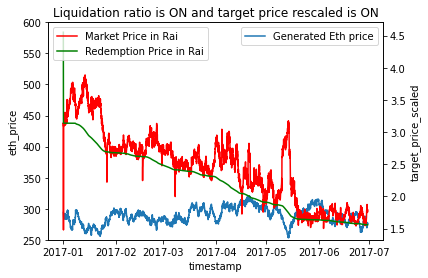

In [14]:
df_true_true = df.query('rescale_target_price==True and arbitrageur_considers_liquidation_ratio == True')
sns.lineplot(data=df_true_true,x="timestamp", y="eth_price",label='Generated Eth price')
plt.ylim(250, 600)
ax2 = plt.twinx()
sns.lineplot(data=df_true_true,x="timestamp", y="market_price",ax=ax2,color='r',label='Market Price in Rai')
sns.lineplot(data=df_true_true,x="timestamp", y="target_price_scaled",ax=ax2,color='g',label='Redemption Price in Rai')
plt.title('Liquidation ratio is ON and target price rescaled is ON')
plt.legend(loc="upper left")
plt.show()

## Conclusion

Implication from Reflexer: negative $K_i$ term is concluded to be introducing negative drift in the market price
